In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from scipy.stats import zscore
from scipy.stats import skew, kurtosis
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv('/Users/mahinbindra/Downloads/new_train.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


In [5]:
df.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
count,32950.000000,32950,32950,32950,32950,32950,32950,32950,32950,32950,32950.000000,32950.000000,32950.000000,32950.000000,32950,32950
unique,NaN,12,4,8,3,3,3,2,10,5,NaN,NaN,NaN,NaN,3,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,NaN,NaN,NaN,NaN,nonexistent,no
freq,NaN,8314,19953,9736,26007,17254,27131,20908,11011,6857,NaN,NaN,NaN,NaN,28416,29238
mean,40.014112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.127466,2.560607,962.052413,0.174719,NaN,NaN
std,10.403636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.975917,2.752326,187.951096,0.499025,NaN,NaN
min,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.000000,1.000000,999.000000,0.000000,NaN,NaN
50%,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.000000,2.000000,999.000000,0.000000,NaN,NaN
75%,47.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,319.000000,3.000000,999.000000,0.000000,NaN,NaN


In [6]:
df.isna().all()

age            False
job            False
marital        False
education      False
default        False
housing        False
loan           False
contact        False
month          False
day_of_week    False
duration       False
campaign       False
pdays          False
previous       False
poutcome       False
y              False
dtype: bool

In [7]:
df.replace('unknown', pd.NA, inplace=True)  # Replace 'unknown' values with NaN

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32685 non-null  object
 2   marital      32885 non-null  object
 3   education    31553 non-null  object
 4   default      26010 non-null  object
 5   housing      32154 non-null  object
 6   loan         32154 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


In [9]:
df2 = df.copy()

In [10]:
# Impute missing values with the most frequent value (mode)
df2['marital'] = df2['marital'].fillna(df2['marital'].mode().iloc[0])
df2['loan'] = df2['loan'].fillna(df2['loan'].mode().iloc[0])
df2['education'] = df2['education'].fillna(df2['education'].mode().iloc[0])
df2['job'] = df2['job'].fillna(df2['job'].mode().iloc[0])
df2['default'] = df2['default'].fillna(df2['default'].mode().iloc[0])
df2['housing'] = df2['housing'].fillna(df2['housing'].mode().iloc[0])

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


In [12]:
df2['marital'].unique()

array(['married', 'divorced', 'single'], dtype=object)

In [13]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

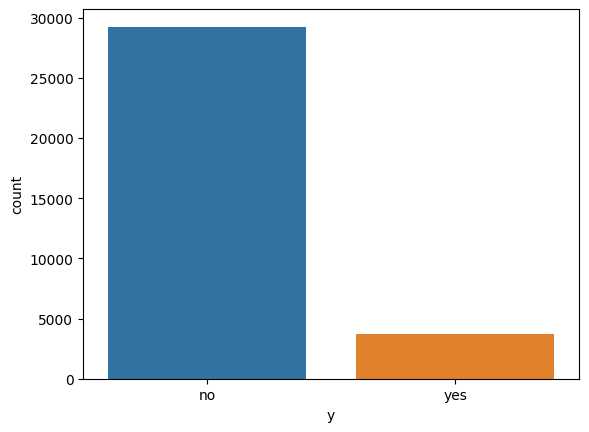

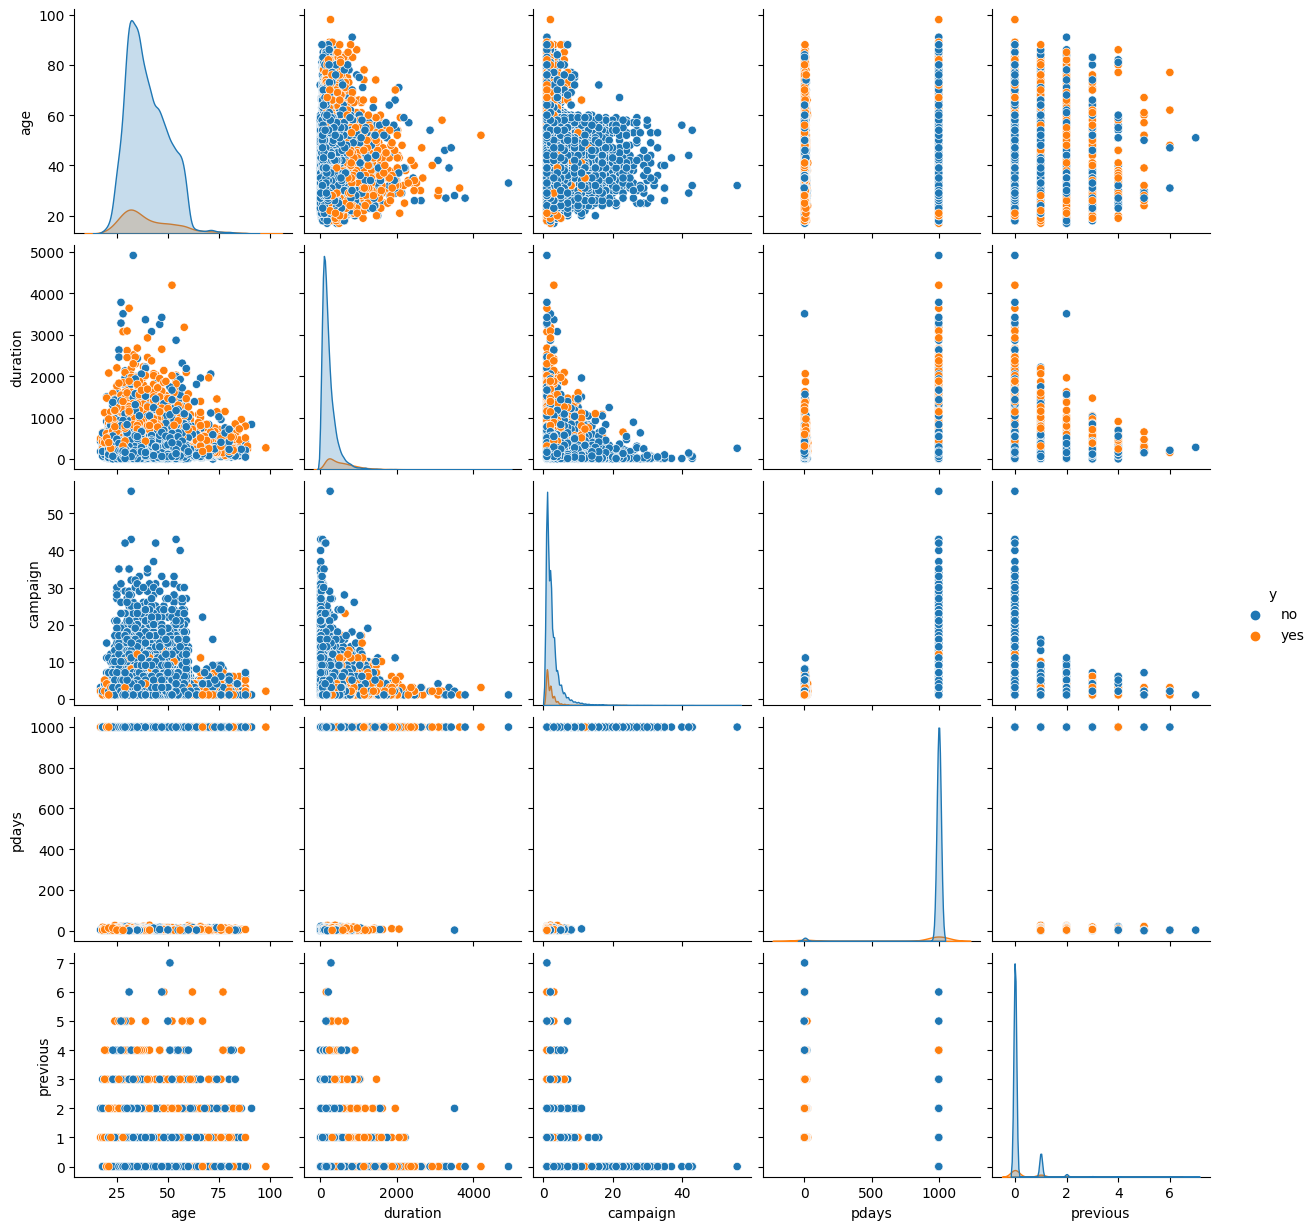

In [14]:
sns.countplot(x='y', data=df2)
plt.show()

# More detailed exploration
sns.pairplot(df2, hue='y')
plt.show()

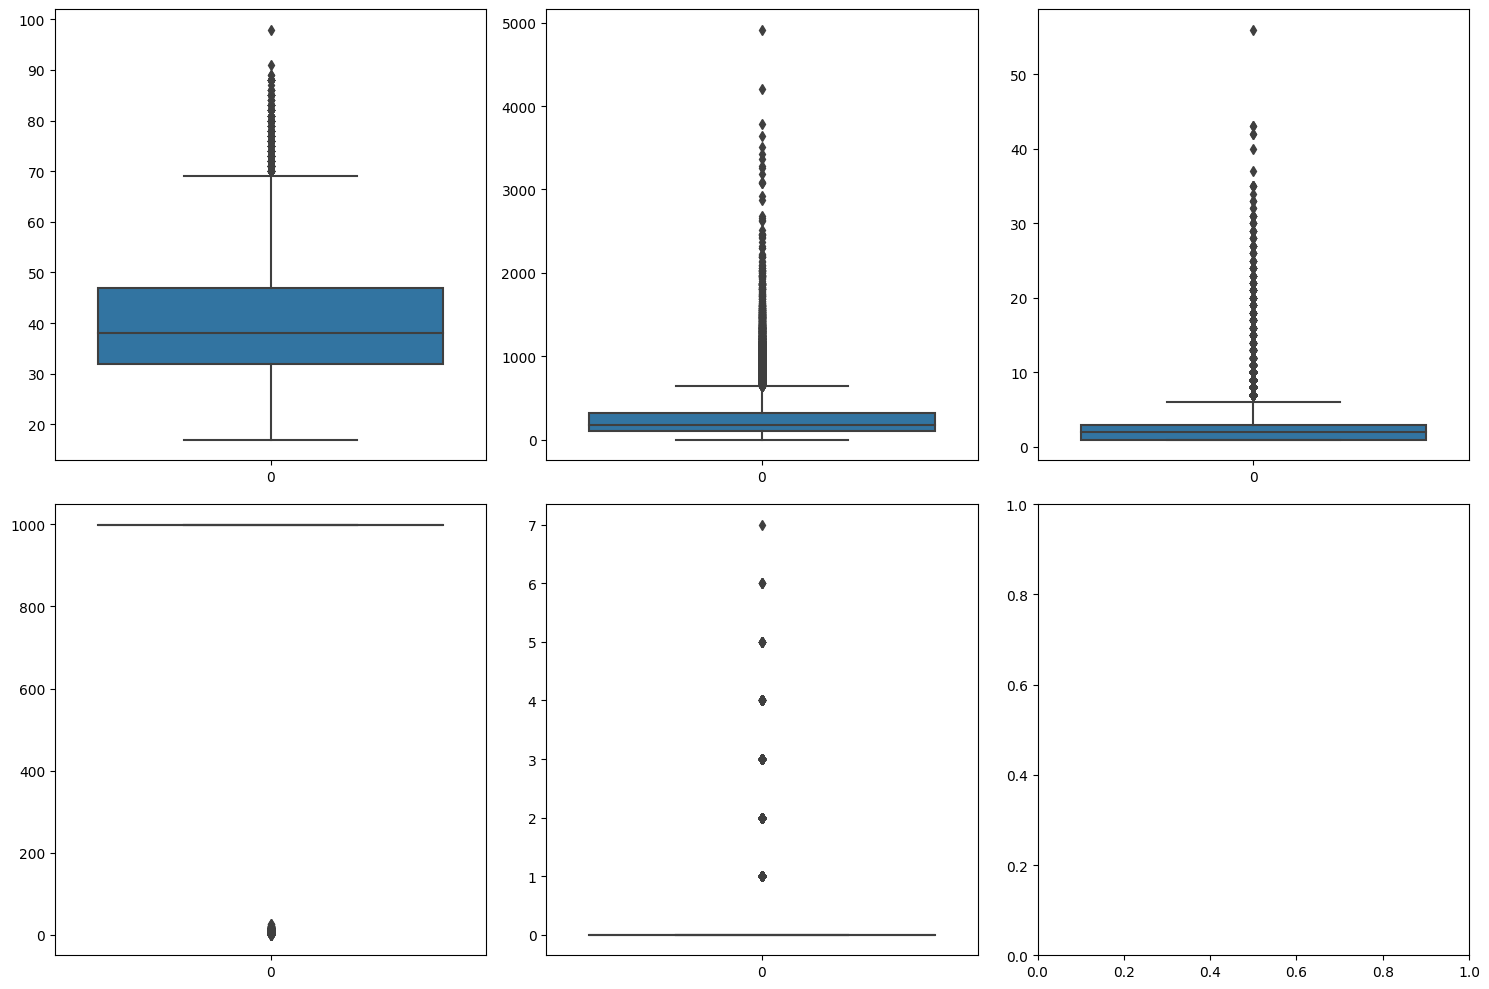

In [15]:
# check for continuous variables first -> age, duration, campaign, pdays, previous

fig, axs = plt.subplots(2,3, figsize = (15,10))
plt1 = sns.boxplot(df2['age'], ax = axs[0,0])
plt2 = sns.boxplot(df['duration'], ax = axs[0,1])
plt3 = sns.boxplot(df['campaign'], ax = axs[0,2])
plt4 = sns.boxplot(df['pdays'], ax = axs[1,0])
plt5 = sns.boxplot(df['previous'], ax = axs[1,1])

plt.tight_layout()

In [16]:
df2[df2['age'] > 90].index

Index([16516, 24339], dtype='int64')

In [17]:
df3 = df2.copy()

In [18]:
df3.drop([16516, 24339], inplace=True)

In [19]:
duration_outliers = df3[df3['duration'] > 4000].index

In [20]:
df3.drop(duration_outliers, inplace=True)

In [21]:
df3[df3['campaign'] > 50].index

Index([30176], dtype='int64')

In [22]:
df3.drop(30176, inplace=True)

In [23]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32945 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32945 non-null  int64 
 1   job          32945 non-null  object
 2   marital      32945 non-null  object
 3   education    32945 non-null  object
 4   default      32945 non-null  object
 5   housing      32945 non-null  object
 6   loan         32945 non-null  object
 7   contact      32945 non-null  object
 8   month        32945 non-null  object
 9   day_of_week  32945 non-null  object
 10  duration     32945 non-null  int64 
 11  campaign     32945 non-null  int64 
 12  pdays        32945 non-null  int64 
 13  previous     32945 non-null  int64 
 14  poutcome     32945 non-null  object
 15  y            32945 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.3+ MB


In [24]:
df3.groupby('y').count()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
y,,,,,,,,,,,,,,,
no,29235,29235,29235,29235,29235,29235,29235,29235,29235,29235,29235,29235,29235,29235,29235
yes,3710,3710,3710,3710,3710,3710,3710,3710,3710,3710,3710,3710,3710,3710,3710


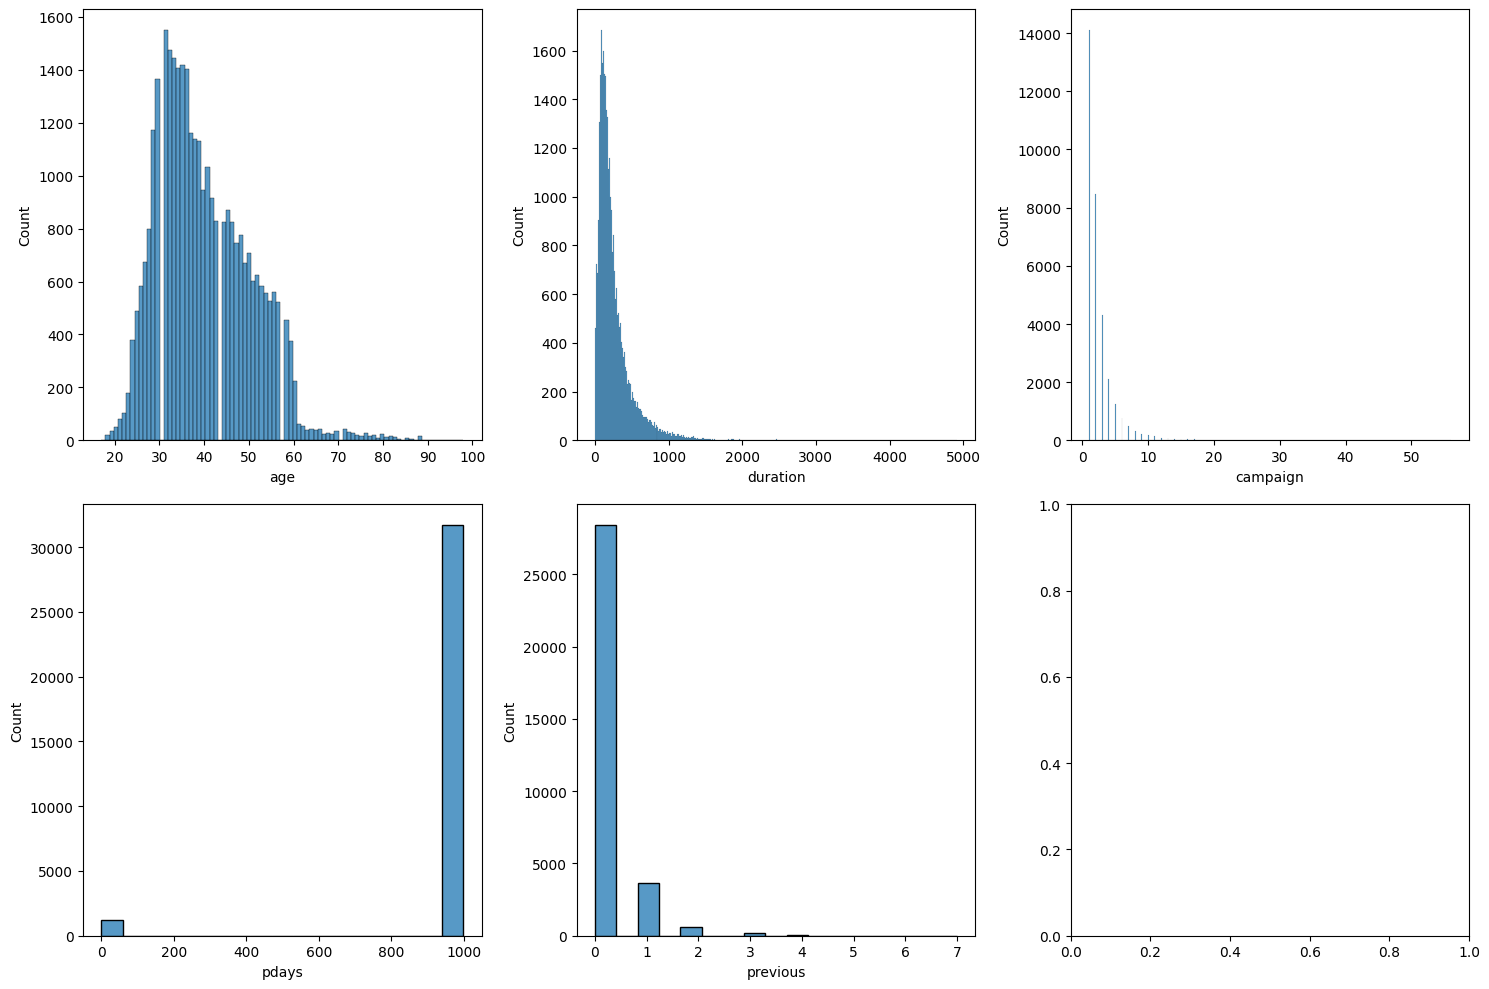

In [25]:
fig, axs = plt.subplots(2,3, figsize = (15,10))
plt1 = sns.histplot(df2['age'], ax = axs[0,0])
plt2 = sns.histplot(df['duration'], ax = axs[0,1])
plt3 = sns.histplot(df['campaign'], ax = axs[0,2])
plt4 = sns.histplot(df['pdays'], ax = axs[1,0])
plt5 = sns.histplot(df['previous'], ax = axs[1,1])

plt.tight_layout()

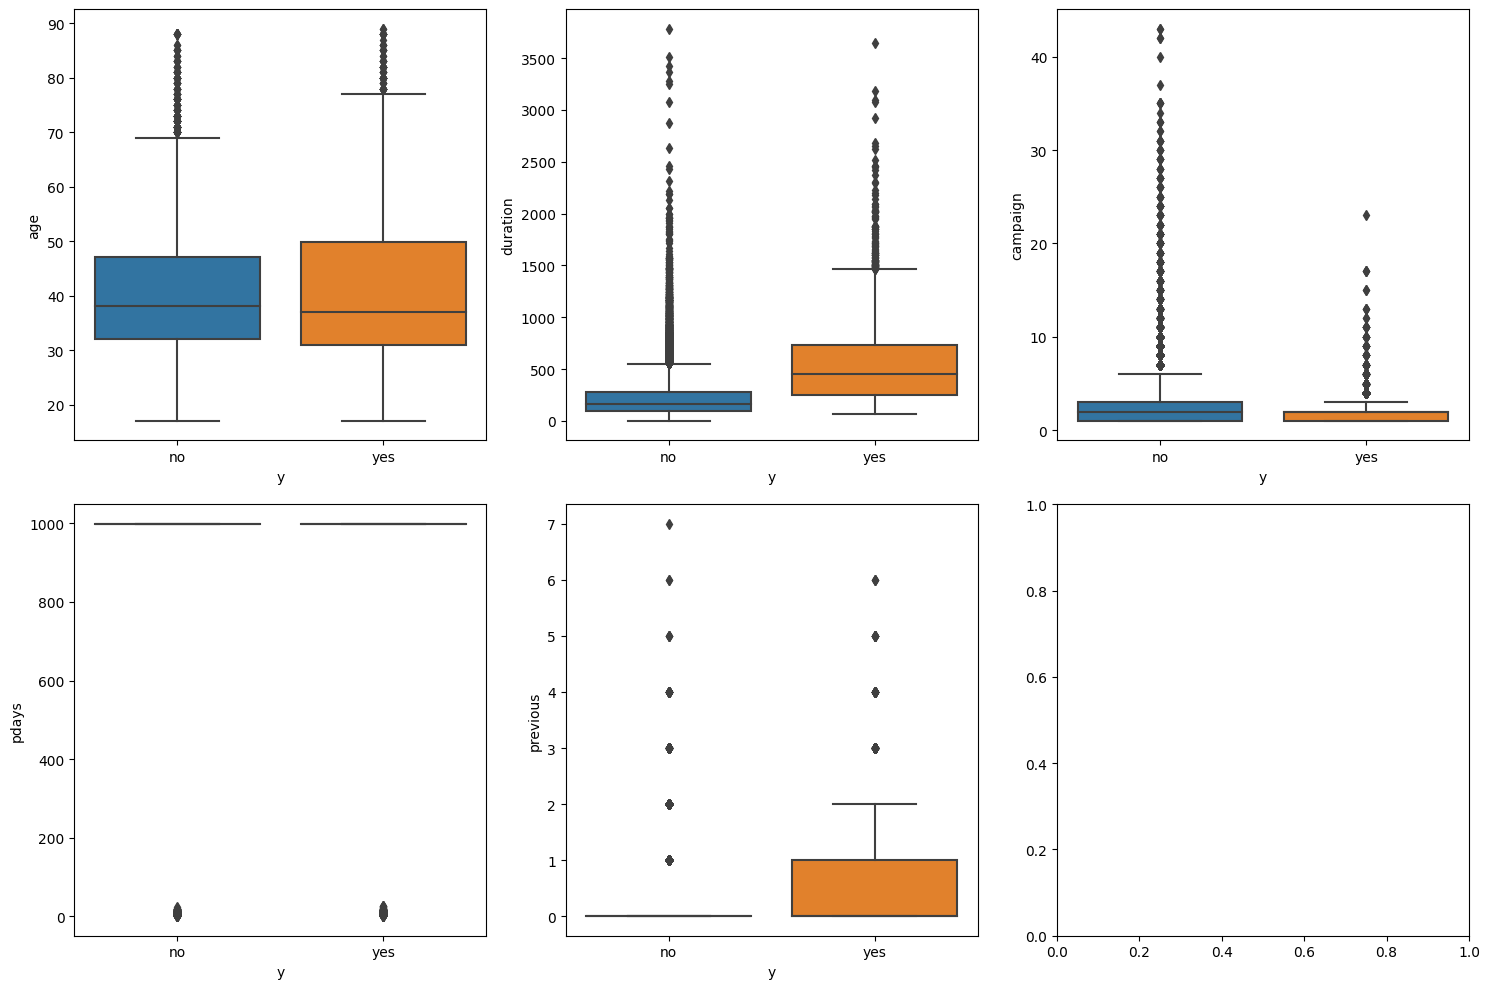

In [26]:
fig, axs = plt.subplots(2,3, figsize = (15,10))
plt1 = sns.boxplot(x='y', y = 'age', data = df3, ax = axs[0,0])
plt2 = sns.boxplot(x='y', y = 'duration', data = df3, ax = axs[0,1])
plt3 = sns.boxplot(x='y', y = 'campaign', data = df3, ax = axs[0,2])
plt4 = sns.boxplot(x='y', y = 'pdays', data = df3, ax = axs[1,0])
plt5 = sns.boxplot(x='y', y = 'previous', data = df3, ax = axs[1,1])

plt.tight_layout()

Seems like duration, age and previous are strong predictors

In [27]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32945 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32945 non-null  int64 
 1   job          32945 non-null  object
 2   marital      32945 non-null  object
 3   education    32945 non-null  object
 4   default      32945 non-null  object
 5   housing      32945 non-null  object
 6   loan         32945 non-null  object
 7   contact      32945 non-null  object
 8   month        32945 non-null  object
 9   day_of_week  32945 non-null  object
 10  duration     32945 non-null  int64 
 11  campaign     32945 non-null  int64 
 12  pdays        32945 non-null  int64 
 13  previous     32945 non-null  int64 
 14  poutcome     32945 non-null  object
 15  y            32945 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.3+ MB


In [28]:
df3['ID'] = range(1, len(df3)+1)
df3['ID'].sort_index()

0            1
1            2
2            3
3            4
4            5
         ...  
32945    32941
32946    32942
32947    32943
32948    32944
32949    32945
Name: ID, Length: 32945, dtype: int64

In [29]:
df3.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'ID'],
      dtype='object')

In [30]:
df3.groupby(['job', 'y'])['ID'].count().unstack()

y,no,yes
job,,
admin.,7475,1103
blue-collar,6926,514
entrepreneur,1060,100
housemaid,769,86
management,2076,269
retired,1017,347
self-employed,980,119
services,2942,254
student,494,217


In [31]:
df3.groupby(['marital', 'y'])['ID'].count().unstack()

y,no,yes
marital,,
divorced,3304,371
married,17985,2029
single,7946,1310


In [32]:
df3.groupby(['education', 'y'])['ID'].count().unstack()

y,no,yes
education,,
basic.4y,2978,342
basic.6y,1709,156
basic.9y,4457,369
high.school,6781,815
illiterate,13,3
professional.course,3718,473
university.degree,9579,1552


In [33]:
df3.groupby(['default', 'y'])['ID'].count().unstack()

y,no,yes
default,,
no,29232.0,3710.0
yes,3.0,NaN


In [34]:
df3.groupby(['housing', 'y'])['ID'].count().unstack()

y,no,yes
housing,,
no,13272,1627
yes,15963,2083


In [35]:
df3.groupby(['loan', 'y'])['ID'].count().unstack()

y,no,yes
loan,,
no,24777,3146
yes,4458,564


In [36]:
df3.groupby(['contact', 'y'])['ID'].count().unstack()

y,no,yes
contact,,
cellular,17833,3073
telephone,11402,637


In [37]:
df4=df3.copy()

In [38]:
df4.dropna(inplace=True)

In [39]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32945 entries, 0 to 32949
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32945 non-null  int64 
 1   job          32945 non-null  object
 2   marital      32945 non-null  object
 3   education    32945 non-null  object
 4   default      32945 non-null  object
 5   housing      32945 non-null  object
 6   loan         32945 non-null  object
 7   contact      32945 non-null  object
 8   month        32945 non-null  object
 9   day_of_week  32945 non-null  object
 10  duration     32945 non-null  int64 
 11  campaign     32945 non-null  int64 
 12  pdays        32945 non-null  int64 
 13  previous     32945 non-null  int64 
 14  poutcome     32945 non-null  object
 15  y            32945 non-null  object
 16  ID           32945 non-null  int64 
dtypes: int64(6), object(11)
memory usage: 4.5+ MB


In [54]:
categorical_features = ['job','marital', 'education','default', 'loan']
numerical_features = ['age','duration', 'previous']
target = 'y'

In [55]:
cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps = [('scaler', StandardScaler())])
preprocessor = ColumnTransformer(transformers = [('categorical_features',cat_transformer, categorical_features),
                                                 ('numerical_features', num_transformer, numerical_features)])

In [56]:
X_train, X_test, y_train, y_test = train_test_split(df4[categorical_features + numerical_features], df4[target],test_size = 0.3, random_state=1234)

In [43]:
x_train_transformed = preprocessor.fit_transform(X_train)
x_test_transformed = preprocessor.fit_transform(X_test)

In [44]:
x_train_transformed.shape

(23061, 28)

In [45]:
x_test_transformed.shape

(9884, 28)

In [46]:
encoded_columns = preprocessor.named_transformers_['categorical_features'].get_feature_names_out(categorical_features)

In [47]:
encoded_columns = encoded_columns.tolist()

In [48]:
X_train_transformed = pd.DataFrame(x_train_transformed)
X_test_transformed = pd.DataFrame(x_test_transformed)

In [57]:
log = LogisticRegression() 
knn = KNeighborsClassifier()
nb = GaussianNB()
svc = SVC()

In [58]:
log_pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('classifier', log)
])
nb_pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('classifier', nb)
])
svc_pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('classifier', svc)
])
knn_pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('classifier', knn)
])

In [59]:
log_pipeline.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical_features',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'loan']),
                                                 ('numerical_features',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'duration',
                                                   'previous'])])),
                ('classifier', LogisticRegression())])

In [60]:
nb_pipeline.fit(X_train, y_train)

TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.